In [1]:
%matplotlib inline

In [36]:
import numpy as np
from Bio import Phylo, SeqIO
import Levenshtein
import random

from matplotlib import pyplot as plt

from scipy import optimize
from scipy import stats


# Piecewise linear fit of hamming distance vs tree distance

In [20]:
seqs = list(SeqIO.parse('../../Phylogenetic_couplings/Data/'
                        'psicov150_aln_pdb/aln_fasta_max1k/1aoeA.fasta', 'fasta'))
            
tree = Phylo.read('../../Phylogenetic_couplings/Data/'
                  'psicov150_aln_pdb/mp_root_trees/1aoeA.newick', 'newick')

In [31]:
seqs = random.sample(seqs, 20)
print(len(seqs))
pairwise_hamming = []
pairwise_tree = []
for i in range(len(seqs)):
    for j in range(i+1, len(seqs)):
        pairwise_hamming.append(Levenshtein.hamming(str(seqs[i].seq), str(seqs[j].seq)))
        pairwise_tree.append(tree.distance(str(seqs[i].id), str(seqs[j].id)))

20


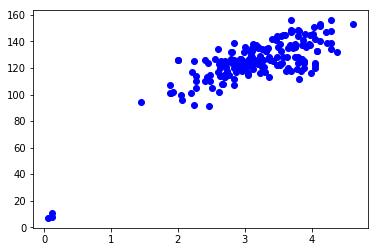

In [32]:
fig, ax = plt.subplots()
ax.plot(pairwise_tree, pairwise_hamming, 'bo')

In [33]:
x = np.array(pairwise_tree, dtype=float)
y = np.array(pairwise_hamming, dtype=float)
p = x.argsort()

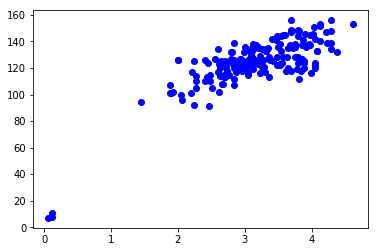

In [34]:
fig, ax = plt.subplots()
ax.plot(x[p], y[p], 'bo')

In [39]:
logliks = []
for i in range(1, len(x)-1):
    a, b, c, d, e = stats.linregress(x[p][:i], y[p][:i])
    print(d)

nan
nan
0.4394561090151014
0.00036036084698642945
0.00029644117063416445
6.178428856989877e-05
7.864412811892034e-06
9.735055017062595e-07
4.658022031384126e-07
1.0436428859031104e-07
9.099474181243061e-08
9.720499055018218e-08
8.219029446181163e-08
1.5598082257135583e-08
2.787420113325e-09
1.1166533423863001e-08
5.294054743992662e-09
1.7135267644616013e-09
4.5605535682631e-10
9.701593279722713e-11
4.931420501408159e-11
1.9999771297584415e-11
4.618418861509036e-12
4.378400003443737e-11
1.6351952256761214e-11
8.558549391550837e-12
7.442640290189827e-12
2.00357864601458e-12
8.088326812256651e-13
2.222936006749705e-13
6.829133844284583e-14
1.5220249306063066e-13
5.6190923387369336e-14
1.75620671583184e-14
9.702400734640925e-15
2.986899075104964e-15
1.0288247151078972e-15
1.1352326787767546e-15
1.2357292801883857e-15
6.831189919913204e-16
4.3835571326713057e-16
2.7785922864066726e-16
9.298269378516115e-17
3.214899719453754e-17
1.2581110827695681e-17
5.905520902539099e-18
3.0208699483385885

/Users/adamhockenberry/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/scipy/stats/_stats_mstats_common.py:93: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/Users/adamhockenberry/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/scipy/stats/_stats_mstats_common.py:95: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
/Users/adamhockenberry/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/scipy/stats/_stats_mstats_common.py:97: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)
